Voyons l'impact d'une découpe initiale de la base différente en proportion : prenons par exemple 90% de la base en tant que base d'apprentissage et 10% en tant que base de test (au lieu de 80% et 20% respectivement).

In [1]:
#Code proposé par M.Nataf:Séance 1
import scipy.io as spi
import numpy as np
import matplotlib.pyplot as plt

In [6]:
mat=spi.loadmat("mnist-original.mat")
data=np.transpose(mat['data'])
label=np.array(mat['label']) #label: chiffre numérisé
label=label.astype(int) #Les labels sont stockés en flottants, on les convertit en entiers

Découpe aléatoire de la base de données en base d'apprentissage et base de test (fonction modifiée)

In [7]:
Y,y=data,label[0]
#On change l'ordre des données et des labels avec la même permutation pour que data_test et data_app soient hétérogènes...
def decoupe_aleatoire_base(Y,y):
    m=np.random.permutation((len(y))) #permutation arbitraire
    Y_m=Y[m] #data après permutation
    y_m=y[m] #labels après permutation
    n=len(Y) #nombre d'images dans la base donnée
    n_90=90*n/100 #nombre d'images dans la base d'apprentissage
    n_90=int(n_90)
    data_app=Y_m[:n_90] #base d'apprentissage
    label_app=y_m[:n_90]
    data_test=Y_m[n_90:] #base de tests
    label_test=y_m[n_90:]
    return data_app,label_app,data_test,label_test

Dans la base d'apprentissage, calcul des centoides des chiffres

In [8]:
def calcul_centroides(data_app,label_app):
    X,x=data_app,label_app 
    moy_chiff=[]
    for i in range(10):
        moy=np.mean(X[x==i],axis=0)
        moy_chiff+=[moy]
    return moy_chiff

Méthode d'estimation par rapport à la distance euclidienne

In [9]:
#Définition de la fonction qui estime le chiffre d'un vecteur de la base de tests:
def estim_chiffre_1(v,moy_chiff):
    distances=np.array([np.linalg.norm(v-u) for u in moy_chiff]) #distances entre v et les "chiffres moyens"
    return np.argmin(distances)

Méthode d'estimation par rapport à la "distance" cosine

In [10]:
#On définit la fonction cosine:
def cosine(u,v):
    return np.inner(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))

In [11]:
#Fonction qui estime le chiffre d'un vecteur de la base de tests vis a vis de la "distance" cosine:
def estim_chiffre_2(v,moy_chiff):
    distances=np.array([cosine(u,v) for u in moy_chiff]) #distances cosine entre v et les "chiffres moyens"
    return np.argmax(distances) #On prend le max car plus l'angle est petit, plus le cos est grand

Méthode d'estimation par rapport à la "distance" cosine

In [12]:
def estim_chiffre_inf(v,moy_chiff):
    distances=np.array([np.linalg.norm(v-u,np.inf) for u in moy_chiff]) #distances entre v et les "chiffres moyens"
    return np.argmin(distances)

print('précision pour la norme infinie est de:', Precision_methode(estim_chiffre_inf,0,Y,y))

Méthode d'estimation par rapport à la norme p

In [13]:
#Fonction qui estime le chiffre d'un vecteur de la base de tests vis a vis de la norme p:
def estim_chiffre_p(p,v,moy_chiff):
    distances=np.array([np.linalg.norm(v-u,p) for u in moy_chiff]) #distances entre v et les "chiffres moyens" en norme p
    return np.argmin(distances)

Calcul du pourcentage de prédictions correctes sur la base de tests

In [14]:
#Labels estimés pour les vecteurs de la base de tests et pour une certaine distance:
def precision_estimation_label(data_test,label_test,methode,p,moy_chiff): # renseigner un p quelconque si on n'utilise pas la norme p (par ex p=0)
    k=len(data_test)
    label_estim=np.zeros(k)
        
    if (methode != estim_chiffre_p):      
        for i in range(k):
            label_estim[i]=methode(data_test[i],moy_chiff)
            #print("la précision obtenue est de", np.mean(label_estim==label_test))
            
    else:
        for i in range(k):
            label_estim[i]=methode(p, data_test[i],moy_chiff)
            #print("la précision obtenue pour p={} est de".format(p), np.mean(label_estim==label_test))
        
    return np.mean(label_estim==label_test) #  pourcentage de prédictions correctes sur la base de tests.

Fonction permettant de calculer la précision d une méthode (pour une seule découpe initiale)

In [15]:
def Precision_methode(methode,p,Y,y):    
    data_app,label_app,data_test,label_test=decoupe_aleatoire_base(Y,y)
    moy_chiff=calcul_centroides(data_app,label_app)
    precision=precision_estimation_label(data_test,label_test,methode,p,moy_chiff)
    return precision

Voyons les estimations de précision pour cette répartition

Précision de la méthode norme euclidienne avec une répartition 90/10% de la base de données

In [16]:
Precision_methode(estim_chiffre_1,0,Y,y)

0.806

(Pour rappel, nous avions trouvé 80.9% de précision moyenne pour cette méthode, avec 100 découpes initiales différentes, et une répartition 80/20%.)

Précision de la méthode cosine avec une répartition 90/10% de la base de données

In [17]:
Precision_methode(estim_chiffre_2,0,Y,y)

0.8202857142857143

(Pour rappel, nous avions trouvé 81.5% de précision moyenne pour cette méthode, avec 100 découpes initiales différentes, et une répartition 80/20%.)

Précision de la méthode norme infinie avec une répartition 90/10% de la base de données

In [19]:
print('précision pour la norme infinie est de:', Precision_methode(estim_chiffre_inf,0,Y,y))

précision pour la norme infinie est de: 0.6754285714285714


Précision de la méthode norme p avec une répartition 90/10% de la base de données

In [13]:
for p in range(3,11):
    print("précision pour", p ,"est de", Precision_methode(estim_chiffre_p,p,Y,y))

précision pour 3 est de 0.8271428571428572
précision pour 4 est de 0.8078571428571428
précision pour 5 est de 0.8062857142857143
précision pour 6 est de 0.799
précision pour 7 est de 0.7765714285714286
précision pour 8 est de 0.7694285714285715
précision pour 9 est de 0.7677142857142857
précision pour 10 est de 0.7632857142857142


Graphique

In [2]:
Decoupe_Fifty=[0.8082857142857143,0.8157142857142857,0.8206285714285714, 0.8087428571428571, 0.7976857142857143, 0.7903714285714286, 0.7799428571428572, 0.7713142857142857,  0.7658571428571429, 0.7626571428571428,0.6678571428571428]
Decoupe_sixty=[0.806,0.8144285714285714,0.8173928571428571, 0.8114285714285714, 0.797, 0.7883571428571429, 0.7843928571428571, 0.7715, 0.7697857142857143,0.7595357142857143,0.6717857142857143]
Decoupe_eighty=[0.8159285714285714,0.8216428571428571,0.8250714285714286, 0.8174285714285714, 0.8033571428571429, 0.7943571428571429, 0.7848571428571428, 0.7779285714285714, 0.7712142857142857, 0.7649285714285714, 0.6752857142857143]
Decoupe_ninety=[0.809, 0.8195714285714286,0.8205, 0.815, 0.8049285714285714, 0.7945714285714286, 0.786, 0.7793571428571429, 0.7722142857142857, 0.7650714285714286,0.6754285714285714]

Legende=['norme2', 'cosine', 'norme3', 'norme4', 'norme5', 'norme6', 'norme7', 'norme8', 'norme9', 'norme10', 'norme \u221e']

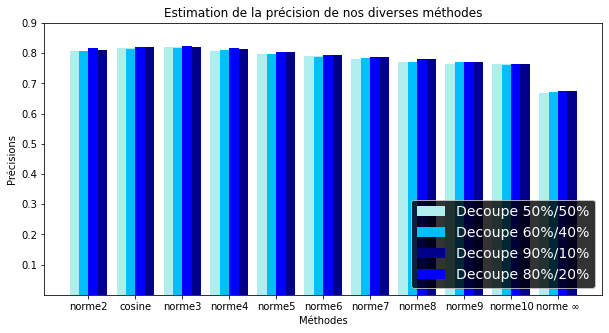

In [8]:
plt.figure(figsize=(10,5))
plt.title('Estimation de la précision de nos diverses méthodes')
plt.bar(Legende,Decoupe_Fifty,width=-0.4, align='edge', label='Decoupe 50%/50%',color='paleturquoise')
plt.bar(Legende,Decoupe_sixty,width=-0.2, align='edge',label='Decoupe 60%/40%',color='deepskyblue')
plt.bar(Legende,Decoupe_ninety,width=0.4, align='edge', label='Decoupe 90%/10%',color='darkblue')
plt.bar(Legende,Decoupe_eighty,width=0.2, align='edge', label='Decoupe 80%/20%',color='blue')
plt.xticks(Legende)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.xlabel(r'Méthodes')
plt.ylabel(r'Précisions')
plt.legend(loc='lower right',prop={'size': 14},facecolor='k', labelcolor='w')
plt.show()

Calcul de l'écart maximum en termes de résultat entre la méthode 1 (découpe 80%/20%) et les autres découpes des bases.

In [23]:
Ecart_max_1=np.max(np.abs(np.array(Decoupe_eighty)-np.array(Decoupe_Fifty)))
Ecart_max_2=np.max(np.abs(np.array(Decoupe_eighty)-np.array(Decoupe_sixty)))
Ecart_max_3=np.max(np.abs(np.array(Decoupe_eighty)-np.array(Decoupe_ninety)))

print("Ecart max entre la méthode 1 (découpe 80%/20%) et la méthode de découpe 50%/50% est de ", Ecart_max_1)
print("Ecart max entre la méthode 1 (découpe 80%/20%) et la méthode de découpe 60%/40% est de ", Ecart_max_2)
print("Ecart max entre la méthode 1 (découpe 80%/20%) et la méthode de découpe 90%/10% est de ", Ecart_max_3)

Ecart max entre la méthode 1 (découpe 80%/20%) et la méthode de découpe 50%/50% est de  0.008685714285714297
Ecart max entre la méthode 1 (découpe 80%/20%) et la méthode de découpe 60%/40% est de  0.009928571428571398
Ecart max entre la méthode 1 (découpe 80%/20%) et la méthode de découpe 90%/10% est de  0.006928571428571395
